In [3]:
Output = ('/Users/alexis/Library/Clouexposuretorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1005. Miscellaneous Analyses/P1005.6. Yael RNAseq Grant/P1005.6.3. Analyses/P1005.6.3.2. Volcano Plots/Output')
cur_date = "011124"

library(readxl)
library(tidyverse)
library(reshape2)
library(ggrepel)
# library(MetBrewer)

#reading in file
exposure_df = data.frame(read_excel("Input/Asthma_Genes_Exposure_DESeq2_011124.xlsx"))

In [4]:
head(exposure_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Exposure1,Exposure2,Covariates
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,KLF4,923.11601,-0.9743332,0.1835047,-5.309581,1.098776e-07,7.966129e-05,Control,Nicotine Salts,None
2,CSF3_1,70.09449,-2.8418923,0.7809307,-3.639110,2.735823e-04,9.917358e-02,Control,Nicotine Salts,None
3,NCOA7,2005.62251,-0.7240906,0.2077258,-3.485799,4.906687e-04,1.185783e-01,Control,Nicotine Salts,None
4,NFIL3,67.07713,-0.7371617,0.2215483,-3.327319,8.768606e-04,1.271448e-01,Control,Nicotine Salts,None
5,ZC3H12C,305.31619,-0.6865087,0.2050402,-3.348167,8.134801e-04,1.271448e-01,Control,Nicotine Salts,None
6,EIF2AK3,571.72427,-0.4722865,0.1546549,-3.053808,2.259563e-03,2.730305e-01,Control,Nicotine Salts,None


Creating a volcano plot to visualize genes that were differentially expressed across tobacco use groups (exposure). 

In [5]:
# adding a col to denote whether a gene had a significant p value, log FC, or both

# add a column of NAs
exposure_df$diffexpressed <- "No Significance"

# if p value is significant only
exposure_df$diffexpressed[exposure_df$pvalue < 0.05] <- "P Value Only"

# if log2FoldChange > log2(1.5) and pvalue < 0.05, set as "significant" 
exposure_df$diffexpressed[abs(exposure_df$log2FoldChange) > abs(log2(1.5)) & exposure_df$pvalue < 0.05] <- "P Value and log2 Fold Change"

# making into a factor
exposure_df$diffexpressed = factor(exposure_df$diffexpressed, levels = c("No Significance", "P Value Only", 
                                                                       "P Value and log2 Fold Change"))

# viewing df
head(exposure_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Exposure1,Exposure2,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
1,KLF4,923.11601,-0.9743332,0.1835047,-5.309581,1.098776e-07,7.966129e-05,Control,Nicotine Salts,None,P Value and log2 Fold Change
2,CSF3_1,70.09449,-2.8418923,0.7809307,-3.639110,2.735823e-04,9.917358e-02,Control,Nicotine Salts,None,P Value and log2 Fold Change
3,NCOA7,2005.62251,-0.7240906,0.2077258,-3.485799,4.906687e-04,1.185783e-01,Control,Nicotine Salts,None,P Value and log2 Fold Change
4,NFIL3,67.07713,-0.7371617,0.2215483,-3.327319,8.768606e-04,1.271448e-01,Control,Nicotine Salts,None,P Value and log2 Fold Change
5,ZC3H12C,305.31619,-0.6865087,0.2050402,-3.348167,8.134801e-04,1.271448e-01,Control,Nicotine Salts,None,P Value and log2 Fold Change
6,EIF2AK3,571.72427,-0.4722865,0.1546549,-3.053808,2.259563e-03,2.730305e-01,Control,Nicotine Salts,None,P Value Only


In [15]:
filtered_df = exposure_df %>%
    # filtering for the crude model
    filter(Covariates == 'None') %>%
    # removing information that denotes that a gene is a duplicate
    separate(Gene, c("Gene", NA)) %>%
    # merging cols to create 1 for the exposure comparision
    unite(col = 'Comparison', c('Exposure1', 'Exposure2'), sep = ' vs. ')

head(filtered_df)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 1770 rows [1, 3, 4, 5, 6,
7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, ...].”


,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Comparison,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,KLF4,923.11601,-0.9743332,0.1835047,-5.309581,1.098776e-07,7.966129e-05,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
2,CSF3,70.09449,-2.8418923,0.7809307,-3.639110,2.735823e-04,9.917358e-02,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
3,NCOA7,2005.62251,-0.7240906,0.2077258,-3.485799,4.906687e-04,1.185783e-01,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
4,NFIL3,67.07713,-0.7371617,0.2215483,-3.327319,8.768606e-04,1.271448e-01,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
5,ZC3H12C,305.31619,-0.6865087,0.2050402,-3.348167,8.134801e-04,1.271448e-01,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
6,EIF2AK3,571.72427,-0.4722865,0.1546549,-3.053808,2.259563e-03,2.730305e-01,Control vs. Nicotine Salts,None,P Value Only


In [32]:
filtered_df %>%
    filter(Gene == 'KLF4')

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Comparison,Covariates,diffexpressed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
KLF4,923.116,-0.97433315,0.1835047,-5.3095808,1.098776e-07,7.966129e-05,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
KLF4,923.116,-0.88343421,0.1835328,-4.8134955,1.483130e-06,1.075269e-03,Control vs. Freebase Nicotine,None,P Value and log2 Fold Change
KLF4,923.116,0.09089894,0.1830500,0.4965799,6.194853e-01,9.988189e-01,Nicotine Salts vs. Freebase Nicotine,None,No Significance


In [70]:
# identifying genes commonly modulated across exposure groups to label them differently
common_genes =  c('KLF4', 'NCOA7', 'CSF3', 'S100A10', 'ZC3H12C', 'CLU')#paste0(
#     "italic('",
#    c('KLF4', 'NCOA7', 'CSF3', 'S100A10', 'ZC3H12C'),
#    "')")

`%notin%` <- Negate(`%in%`)

common_genes_df = filtered_df %>%
    filter(Gene %in% common_genes & diffexpressed == "P Value and log2 Fold Change") 
noncommon_genes_df = filtered_df %>%
    filter(Gene %notin% common_genes & diffexpressed == "P Value and log2 Fold Change")

head(common_genes_df)

,Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Comparison,Covariates,diffexpressed
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
1,KLF4,923.11601,-0.9743332,0.1835047,-5.309581,1.098776e-07,7.966129e-05,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
2,CSF3,70.09449,-2.8418923,0.7809307,-3.639110,2.735823e-04,9.917358e-02,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
3,NCOA7,2005.62251,-0.7240906,0.2077258,-3.485799,4.906687e-04,1.185783e-01,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
4,ZC3H12C,305.31619,-0.6865087,0.2050402,-3.348167,8.134801e-04,1.271448e-01,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
5,CLU,50.29966,-0.9437717,0.3911688,-2.412697,1.583498e-02,9.566965e-01,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
6,KLF4,923.11601,-0.8834342,0.1835328,-4.813495,1.483130e-06,1.075269e-03,Control vs. Freebase Nicotine,None,P Value and log2 Fold Change


# Volcano Plot

In [85]:
unique(noncommon_genes_df$Gene)

[1] "NFIL3"  "KLF9"   "ODC1"   "SPRY1"  "TFF3"   "ATG101" "CTNS"   "DUSP6" 
 [9] "FNIP2"  "STX5"

In [86]:
noncommon_genes_df

Gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Comparison,Covariates,diffexpressed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
NFIL3,67.07713,-0.7371617,0.2215483,-3.327319,0.0008768606,0.1271448,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
KLF9,183.03092,-0.6016147,0.2484802,-2.421177,0.0154703310,0.9566965,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
ODC1,721.31984,-0.9481606,0.4697451,-2.018458,0.0435436251,0.9995847,Control vs. Nicotine Salts,None,P Value and log2 Fold Change
SPRY1,134.24807,0.8529865,0.2698466,3.161005,0.0015722560,0.3799619,Control vs. Freebase Nicotine,None,P Value and log2 Fold Change
TFF3,943.14486,-0.8245283,0.4011846,-2.055234,0.0398563831,0.9999205,Control vs. Freebase Nicotine,None,P Value and log2 Fold Change
ATG101,218.40295,0.7158720,0.2919085,2.452385,0.0141912815,0.9988189,Nicotine Salts vs. Freebase Nicotine,None,P Value and log2 Fold Change
CTNS,51.45450,0.9036689,0.3685094,2.452228,0.0141974807,0.9988189,Nicotine Salts vs. Freebase Nicotine,None,P Value and log2 Fold Change
DUSP6,81.67544,0.8129908,0.3957339,2.054388,0.0399381775,0.9988189,Nicotine Salts vs. Freebase Nicotine,None,P Value and log2 Fold Change
FNIP2,54.35367,0.6610632,0.2694153,2.453696,0.0141396449,0.9988189,Nicotine Salts vs. Freebase Nicotine,None,P Value and log2 Fold Change


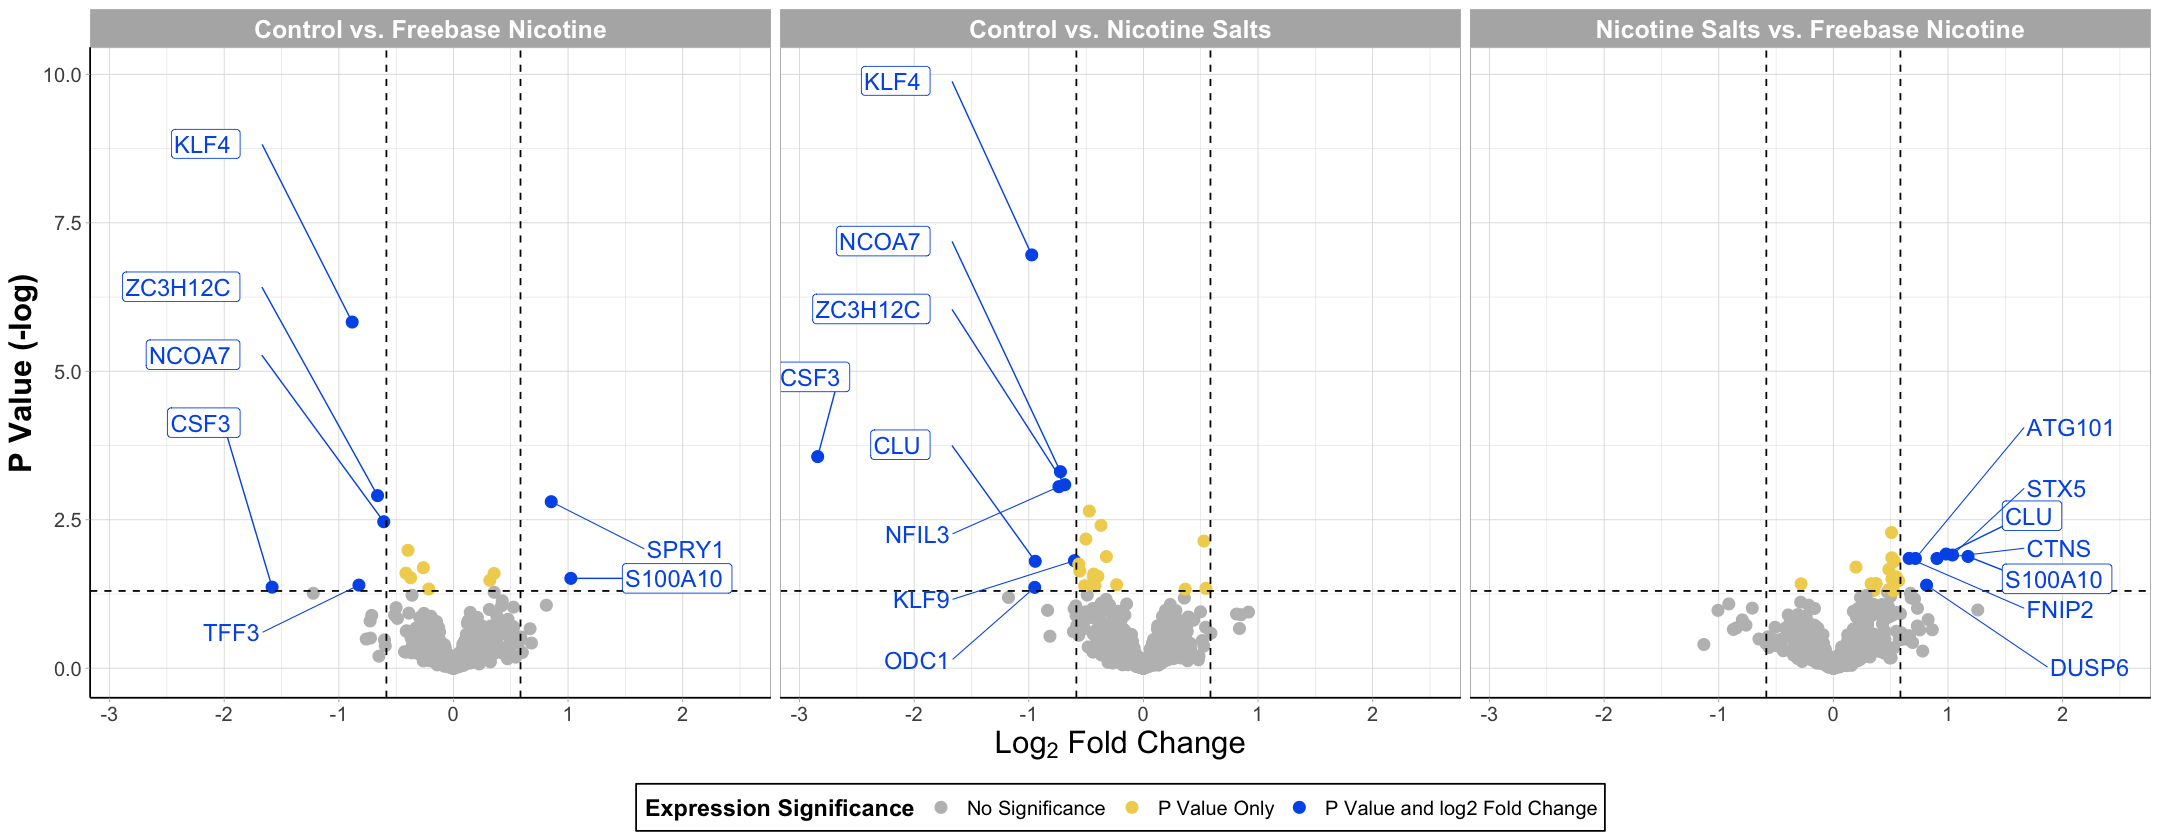

In [87]:
options(repr.plot.width=18, repr.plot.height=7) #changing size

ggplot() + 
  geom_point(data = filtered_df, aes(x = log2FoldChange, y = -log10(pvalue), color = diffexpressed), size = 3) + 

  # P Value line
  geom_hline(yintercept = -log10(0.05), linetype = "dashed") + 
  # FC Line
  geom_vline(xintercept = log2(1.5), linetype = "dashed") +
  geom_vline(xintercept = -log2(1.5), linetype = "dashed") +

  # changing x limits of what is visible in the plot
  xlim(-2.9, 2.5) + 

 #labeling points with statistical significance and FC
  geom_label_repel(data = common_genes_df %>%
                  filter(log2FoldChange > log2(1.5)), aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed),
                    xlim = c(1.5, NA), hjust = 0, segment.size = 0.4, box.padding = 0.7, max.overlaps = Inf, size = 5, show.legend = FALSE, 
                   parse = TRUE) + 

  geom_label_repel(data = common_genes_df %>%
                  filter(log2FoldChange < -log2(1.5)), aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed),
                    xlim = c(NA, -1.5), hjust = 0, segment.size = 0.4, box.padding = 0.8, max.overlaps = Inf, size = 5, show.legend = FALSE, 
                   parse = TRUE, nudge_y = 3) + 

  geom_text_repel(data = noncommon_genes_df %>%
                  filter(log2FoldChange > log2(1.5)), 
                  aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), xlim = c(1.5, NA), hjust = 0, 
                  segment.size = 0.3, box.padding = 0.9, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE, nudge_y = -0.8) + 

  geom_text_repel(data = noncommon_genes_df %>%
                  filter(log2FoldChange < -log2(1.5)), 
                 aes(x = log2FoldChange, y = -log10(pvalue), label = Gene, color = diffexpressed), xlim = c(NA, -1.5),hjust = 0, 
                 segment.size = 0.3, box.padding = 0.9, max.overlaps = Inf, size = 5, show.legend = FALSE, parse = TRUE, nudge_y = -0.8) + 

  facet_wrap(~Comparison, scales = 'free_x') + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = "bottom", # changing legend position
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = expression(Log[2]*" Fold Change"), y = 'P Value (-log)') +

  scale_color_manual(name = "Expression Significance",
                      values = c("gray", '#F0D25E', "#005BEA"))